In [11]:
with open('slovakBenHurTextClean.txt', 'r', encoding="utf8") as f:
    lines = f.readlines()
lines

['pohoří džebel es zubleh přes padesát mil dlouhé je tvarem svým tak úzké že nárys jeho na mapě podobá se housence plazící se od jihu k severu  staneme li na červenobílých jeho skalinách a díváme li se směrem k vycházejícímu slunci vidíme toliko arabskou poušť kde pověstné východní větry vinařům jerišským tak zlopověstné vály odjakživa divým rejem  celé jeho úpatí je pokryto ulehlým pískem přivátým od eufratu neboť pohoří jest na západě hradbou pastvinám moabským a ammonským kteréžto kraje tvořily kdysi rovněž část pouště od jihu k východu judeje podlehlo zde vše vlivu mluvy arabovy takže v jeho jazyku je starý džebel otcem nesčetných vádí které prostupují římskou silnici  dnes arciť jen slabý stín toho čím kdysi bývala prášivou stezkou syrských poutníků putujících do mekky a zpět a vyrývají své brázdy čím dále hlouběji aby odváděly přívaly dešťové vody do jordánu nebo do své poslední nádrže  mrtvého moře z jednoho z těchto vádí přesněji řečeno z vádí jež vzniká na nejzazším konci džeb

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from collections import defaultdict

In [13]:
words_dict = {}

def line_to_word_list(line):
    for word in line[0].split(" "):
        if word!="":
            if word in words_dict:
                words_dict[word]+=1
            else:
                words_dict[word]=1

line_to_word_list(lines)
sorted_words = dict(sorted(words_dict.items(), key=lambda elem: elem[1], reverse=True))
sorted_words

{'a': 292,
 'se': 266,
 'na': 131,
 'v': 101,
 'z': 80,
 'jsem': 75,
 'k': 70,
 'do': 52,
 'je': 49,
 'že': 47,
 's': 47,
 'byl': 41,
 'to': 41,
 'po': 40,
 'jeho': 39,
 'tak': 35,
 'o': 34,
 'za': 31,
 'jako': 31,
 'si': 29,
 'i': 24,
 'jest': 23,
 'josef': 23,
 'li': 22,
 'bylo': 22,
 'od': 21,
 'již': 21,
 'mu': 20,
 've': 20,
 'pak': 20,
 'mi': 20,
 'dále': 19,
 'zde': 18,
 'aby': 17,
 'až': 17,
 'neboť': 16,
 'když': 16,
 'co': 16,
 'její': 16,
 'tu': 15,
 'tam': 15,
 'byla': 15,
 'u': 15,
 'by': 14,
 'pravil': 14,
 'ani': 14,
 'kde': 13,
 'jak': 13,
 'oči': 13,
 'sebe': 13,
 'nad': 13,
 'ruce': 13,
 'jenž': 13,
 'rabbi': 13,
 'své': 12,
 'tvář': 12,
 'mezi': 12,
 'které': 11,
 'budiž': 11,
 'let': 11,
 'ze': 11,
 'muž': 11,
 'před': 11,
 'bůh': 11,
 'jí': 11,
 'ke': 11,
 'jen': 10,
 'jež': 10,
 'pro': 10,
 'jsou': 10,
 'svého': 10,
 'leč': 10,
 'jim': 10,
 'dům': 10,
 'údolí': 10,
 'přes': 9,
 'nebo': 9,
 'zemi': 9,
 'sem': 9,
 'nebylo': 9,
 'kolem': 9,
 'poté': 9,
 'opět': 9,
 '

In [14]:
df_ben_hur = pd.DataFrame(columns = ['RANGA','ILOŚĆ','CZĘSTOŚĆ ZIPFA'])
rank = 1
for word, count in sorted_words.items():
  df_ben_hur.loc[word] = [rank, count, rank*count]
  rank+=1
df_ben_hur.head()

,RANGA,ILOŚĆ,CZĘSTOŚĆ ZIPFA
a,1,292,292
se,2,266,532
na,3,131,393
v,4,101,404
z,5,80,400


In [15]:
df_ben_hur.head(10)

,RANGA,ILOŚĆ,CZĘSTOŚĆ ZIPFA
a,1,292,292
se,2,266,532
na,3,131,393
v,4,101,404
z,5,80,400
jsem,6,75,450
k,7,70,490
do,8,52,416
je,9,49,441
že,10,47,470


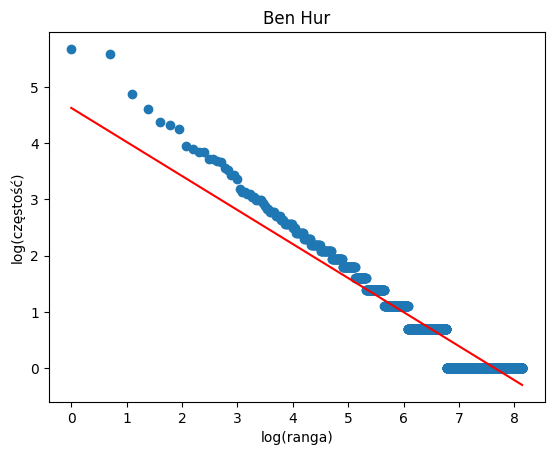

In [21]:
ranks = np.log(df_ben_hur['RANGA']).tolist()
counts = np.log(df_ben_hur['ILOŚĆ']).tolist()

slope, intercept = np.polyfit(ranks, counts, 1)
x = np.array(ranks)
plt.plot(x, slope * x + intercept, color='red', label='Linia regresji')

plt.title('Ben Hur')
plt.xlabel('log(ranga)')
plt.ylabel('log(częstość)')
plt.scatter(ranks, counts)

In [17]:
with open('voynichFullTextClean.txt', 'r', encoding="utf8") as f:
    lines = f.readlines()
    
words_dict = {}

def line_to_word_list(line):
    for word in line[0].split(" "):
        if word!="":
            if word in words_dict:
                words_dict[word]+=1
            else:
                words_dict[word]=1

line_to_word_list(lines)
sorted_words = dict(sorted(words_dict.items(), key=lambda elem: elem[1], reverse=True))
sorted_words

{'8AM': 215,
 'TOE': 122,
 'TOR': 101,
 'HZG': 64,
 '8G': 59,
 'SOE': 52,
 '2': 50,
 'TG': 46,
 '8AR': 45,
 'SO': 42,
 '8AN': 38,
 'OR': 34,
 'SOR': 33,
 'SG': 33,
 'HZOR': 31,
 '8AE': 29,
 '4OHTG': 27,
 '8OE': 26,
 'HZOE': 24,
 'OHTG': 24,
 '4ODTG': 24,
 '8OR': 23,
 'TCG': 23,
 'DTG': 21,
 'OE': 21,
 'TAM': 19,
 'SCG': 18,
 'TCOR': 18,
 'DZG': 17,
 '2AM': 17,
 'OHAM': 17,
 '4ODG': 16,
 'OHG': 16,
 'SO8G': 15,
 'HZCG': 15,
 'O8AM': 15,
 'ODOE': 15,
 'ODG': 15,
 'TO8G': 15,
 'TO': 15,
 '8AK': 14,
 '4OHG': 14,
 'ODAM': 13,
 'OHTOE': 13,
 'TAR': 13,
 '8AIR': 13,
 '8TG': 13,
 '4ODOE': 13,
 'TO8AM': 12,
 'OHOE': 12,
 'TOHG': 12,
 '8TOR': 12,
 'SCCG': 12,
 'GDTG': 12,
 'HTG': 12,
 'TDZG': 12,
 'DAM': 11,
 'THZG': 11,
 'DTOR': 11,
 'HZAR': 10,
 '2G': 10,
 'G': 10,
 'DOE': 10,
 'DG': 10,
 'OHTOR': 10,
 'ODTG': 10,
 'K': 10,
 'DTOE': 10,
 '4ODTOE': 10,
 'AR': 9,
 'TCAR': 9,
 'TOHZG': 9,
 'SAM': 9,
 'ODAE': 9,
 'ODTOR': 9,
 'OHOR': 9,
 '4ODAM': 9,
 '4OHOR': 9,
 '4ODC8G': 9,
 'HZAM': 8,
 '2OR': 8

In [18]:
df_voynich = pd.DataFrame(columns = ['RANGA','ILOŚĆ','CZĘSTOŚĆ ZIPFA'])
rank = 1
for word, count in sorted_words.items():
  df_voynich.loc[word] = [rank, count, rank*count]
  rank+=1
df_voynich.head(10)

,RANGA,ILOŚĆ,CZĘSTOŚĆ ZIPFA
8AM,1,215,215
TOE,2,122,244
TOR,3,101,303
HZG,4,64,256
8G,5,59,295
SOE,6,52,312
2,7,50,350
TG,8,46,368
8AR,9,45,405
SO,10,42,420


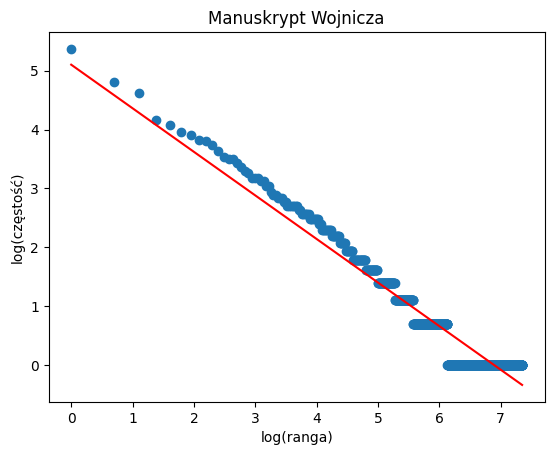

In [19]:
ranks = np.log(df_voynich['RANGA']).tolist()
counts = np.log(df_voynich['ILOŚĆ']).tolist()

slope, intercept = np.polyfit(ranks, counts, 1)
x = np.array(ranks)
plt.plot(x, slope * x + intercept, color='red', label='Linia regresji')

plt.title('Manuskrypt Wojnicza')
plt.xlabel('log(ranga)')
plt.ylabel('log(częstość)')
plt.scatter(ranks, counts)
plt.show()